In [73]:
%reset
from landlab.plot import imshow_grid
from landlab import RasterModelGrid, CLOSED_BOUNDARY, FIXED_VALUE_BOUNDARY
from landlab.components import FlowRouter, FastscapeEroder, LinearDiffuser
from matplotlib.pyplot import figure, show, plot, xlabel, ylabel, title
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from landlab.io import write_esri_ascii
%matplotlib inline 

import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


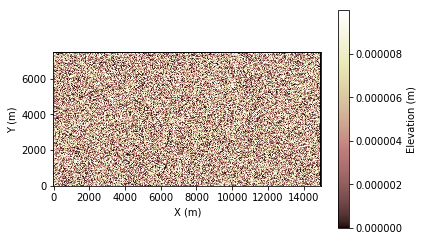

In [74]:
filenameHeader = "Fastscape_10Myr_100yrTimeStep_halfmmyr"

rowsNum = 250 # number of raster cells in vertical direction (y)
colsNum = 500 # number of raster cells in horizontal direction (x)
dxy  = 30 # side length of a raster model cell, or resolution [m]
lengthKm = (dxy * rowsNum)/1000
widthKm = (dxy * colsNum)/1000

mg = RasterModelGrid((rowsNum, colsNum), dxy) # The grid is 200 rows by 100 columns, with dx = dy = 50 m.

for edge in (mg.nodes_at_left_edge, mg.nodes_at_right_edge, mg.nodes_at_top_edge):
             mg.status_at_node[edge] = CLOSED_BOUNDARY
for edge in (mg.nodes_at_bottom_edge):
             mg.status_at_node[edge] = FIXED_VALUE_BOUNDARY
        
z = mg.add_zeros('node', 'topographic__elevation')
initial_roughness = np.random.rand(mg.core_nodes.size)/100000.
mg.at_node['topographic__elevation'][mg.core_nodes] += initial_roughness


imshow_grid(mg, z, grid_units=['m','m'], var_name='Elevation (m)')  

In [75]:
total_t = 10000000. # years
dt = 5000 # years
#postUplfitTime = 100000 # phase of no uplift after 10Ma
nt = int(total_t // dt) # number of time steps
#timeStepNumPostOrogen = int(postUplfitTime // dt)

uplift_rate = 0.0005 # m/yr
uplift_per_step = uplift_rate * dt # depth (m) of uplift per timestep

In [ ]:
K_sp=1E-5
m_sp=0.5
n_sp=1.0

fr = FlowRouter(mg, method='D8')
sp = FastscapeEroder(mg, K_sp=1E-5, m_sp=0.5, n_sp=1.0, threshold_sp=0., rainfall_intensity=1.)
                    
k_d = 0.05
lin_diffuse = LinearDiffuser(mg, linear_diffusivity=k_d )
#PerronNLDiffuse(mg, nonlinear_diffusivity=None, S_crit=30.*np.pi/180., rock_density=2700., sed_density=2700.)



In [ ]:
meanElevationArray = []
timeArray = []
maxElevationArray =[]
zDiffArray=[]

for i in range(nt):
    zOld = z
    mg.at_node['topographic__elevation'][mg.core_nodes] += uplift_per_step # add uplift
    
    fr.run_one_step() # route flow
    sp.run_one_step(dt) # fluvial incision
    lin_diffuse.run_one_step(dt) # linear diffusion
    
    
    meanElevation = np.mean(z)
    maxElevation = np.max(z)
    
    
    timeArray.append(i*dt)
    meanElevationArray.append(meanElevation)
    maxElevationArray.append(maxElevation)
    
    zDiff = z-zOld
    
    zDiffArray.append(max(zDiff))
    
    if i % 20 == 0:
      print ("Completed loop ", i, " out of ", nt)
    
    if i %10000 ==0:
        plt.figure(3) 
        plt.clf
        plt.plot(timeArray, meanElevationArray)
        axes = plt.gca()
        axes.set_xlim([0,10000000])
        axes.set_ylim([0,4000])
        plt.xlabel('Time (Myr)', fontsize=18)
        plt.ylabel('Elevation (m)', fontsize=18)

        meanElevationFigName = filenameHeader + "meanElevation"+str(i)+".png"
        plt.savefig(meanElevationFigName)
        
        plt.figure(4)   
        plt.clf
        plt.plot(timeArray, maxElevationArray)
        axes = plt.gca()
        axes.set_xlim([0,10000000])
        axes.set_ylim([0,4000])
        plt.xlabel('Time (Myr)', fontsize=18)
        plt.ylabel('Elevation (m)', fontsize=18)

        maxElevationFigName = filenameHeader + "maxElevation"+str(i)+".png"
        plt.savefig(maxElevationFigName)
        
        filename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" + "n_"+ str(n_sp) + "_" +\
        "LinDiffusion_" + str(k_d) + "_" + str(widthKm) + "x" + str(lengthKm)+ "km_" + "30mRes" + str(i)+".txt"

        write_esri_ascii(filename, mg, 'topographic__elevation')

('Completed loop ', 0, ' out of ', 2000)
('Completed loop ', 20, ' out of ', 2000)
('Completed loop ', 40, ' out of ', 2000)
('Completed loop ', 60, ' out of ', 2000)
('Completed loop ', 80, ' out of ', 2000)
('Completed loop ', 100, ' out of ', 2000)
('Completed loop ', 120, ' out of ', 2000)
('Completed loop ', 140, ' out of ', 2000)
('Completed loop ', 160, ' out of ', 2000)
('Completed loop ', 180, ' out of ', 2000)
('Completed loop ', 200, ' out of ', 2000)
('Completed loop ', 220, ' out of ', 2000)
('Completed loop ', 240, ' out of ', 2000)
('Completed loop ', 260, ' out of ', 2000)
('Completed loop ', 280, ' out of ', 2000)
('Completed loop ', 300, ' out of ', 2000)
('Completed loop ', 320, ' out of ', 2000)
('Completed loop ', 340, ' out of ', 2000)
('Completed loop ', 360, ' out of ', 2000)
('Completed loop ', 380, ' out of ', 2000)
('Completed loop ', 400, ' out of ', 2000)
('Completed loop ', 420, ' out of ', 2000)
('Completed loop ', 440, ' out of ', 2000)
('Completed loop 

In [ ]:
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'),
                var_name='Elevation (m)')

In [ ]:
#Plot and save mean elevation through time

plt.figure(4)    
plt.plot(timeArray, zDiffArray)
axes = plt.gca()
axes.set_xlim([0,10000000])
axes.set_ylim([0,1000])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

meanElevationFigName = filenameHeader + "meanElevation.png"
plt.savefig(meanElevationFigName)

In [ ]:
#Plot and save max elevation through time

plt.figure(3)    
plt.plot(timeArray, maxElevationArray)
axes = plt.gca()
axes.set_xlim([0,10000000])
axes.set_ylim([0,2000])
plt.xlabel('Time (Myr)', fontsize=18)
plt.ylabel('Elevation (m)', fontsize=18)

maxElevationFigName = filenameHeader + "maxElevation.png"
plt.savefig(maxElevationFigName)

In [ ]:
filename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" + "n_"+ str(n_sp) + "_" +\
    "LinDiffusion_" + str(k_d) + "_" + str(widthKm) + "x" + str(lengthKm)+ "km_" + "30mRes" + ".txt"

write_esri_ascii(filename, mg, 'topographic__elevation')

In [ ]:
#Write out text files for mean elevation, max elevation, and time

meanElevavationFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_meanElevation" + ".txt"

np.savetxt(meanElevavationFilename, meanElevationArray, delimiter=" ")


maxElevavationFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_maxElevation" + ".txt"

np.savetxt(maxElevavationFilename, maxElevationArray, delimiter=" ")


timeFilename = filenameHeader + "k_" + str(K_sp) + "_" + "m_" + str(m_sp) + "_" \
    + "n_"+ str(n_sp) + "_" + "LinDiffusion_" + str(k_d) + "_" + str(widthKm) \
    + "x" + str(lengthKm)+ "km_" + "30mRes" + "_timeMyr" + ".txt"

np.savetxt(timeFilename, timeArray, delimiter=" ")